Website Behavior Analysis
--

**Problem**: The client is an online ecommerce player. They have shared a user level log data for their browsing behavior (Timestamp, UserId and website section visited). You have been provided with the final conversion data too (Timestamp, UserID, Products Purchased in the transaction, Overall Cart Value).

**Task**: Based on this data you are required to build features and model on these characteristics of users to calculate a score/rank for conversion probability of that user.

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Succesfull')

Libraries Import Succesfull


In [ ]:
from google.colab import files
files.upload()

Saving Site_Browsing_Behavior.txt to Site_Browsing_Behavior (2).txt


In [ ]:
site_browsing = pd.read_csv('Site_Browing_Behavior.txt', delimiter='\t', header=None) 

site_browsing.columns=['Timestamp', 'UserID','Website_section_visited']

In [ ]:
site_browsing.head()

,Timestamp,UserID,Website_section_visited
0,2017-07-26 00:01:40.965,0,product
1,2017-07-26 00:03:18.448,0,product
2,2017-07-26 00:36:59.028,0,default
3,2017-07-26 00:41:17.273,0,product-listing-category
4,2017-07-26 00:45:39.197,0,content


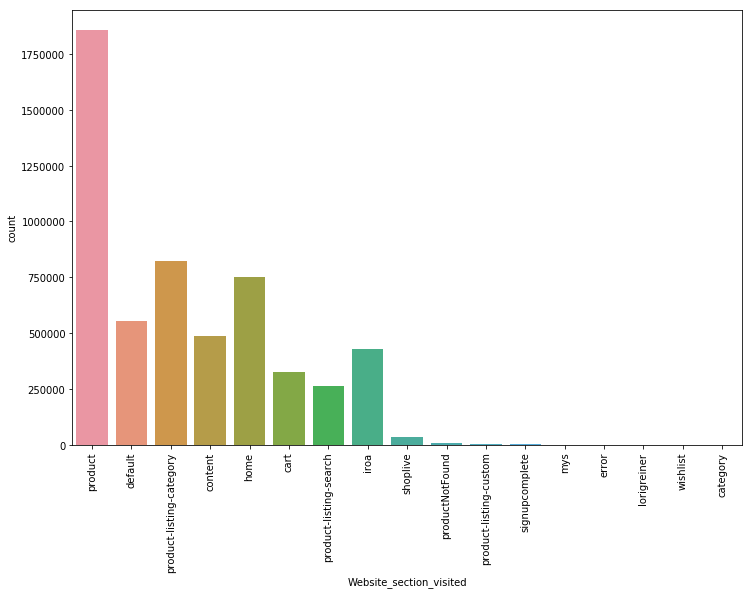

In [ ]:
## plotting and checking unique no. of sections on our web site
plt.figure(figsize=(12,8))
sns.countplot(site_browsing['Website_section_visited'])
plt.xticks(rotation=90);

In [ ]:
print("Shape of Dataset : ",site_browsing.shape)

Shape of Dataset :  (5535924, 3)


In [ ]:
site_browsing.isnull().sum()

Timestamp                  0
UserID                     0
Website_section_visited    0
dtype: int64

In [ ]:
site_browsing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5535924 entries, 0 to 5535923
Data columns (total 3 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   Timestamp                object
 1   UserID                   int64 
 2   Website_section_visited  object
dtypes: int64(1), object(2)
memory usage: 84.5+ MB


In [ ]:
#Number of UserIds in dataset
site_browsing['UserID'].nunique()

516932

In [ ]:
site_browsing['Website_section_visited'].value_counts()

product                     1855680
product-listing-category     823365
home                         752124
default                      552025
content                      488874
iroa                         428497
cart                         323325
product-listing-search       262481
shoplive                      35810
productNotFound                9333
product-listing-custom         2970
signupcomplete                 1312
mys                              63
error                            60
lorigreiner                       3
wishlist                          1
category                          1
Name: Website_section_visited, dtype: int64

In [ ]:
# to analyse how many times an account visited
Login_count = site_browsing.groupby('UserID').Website_section_visited.agg(['count']).reindex(
    site_browsing.UserID).reset_index()

Login_count.columns=['UserID','No_of_times_visited']

Login_count.drop_duplicates(inplace=True)

Login_count.head()

,UserID,No_of_times_visited
0,0,1407879
101129,544439661706349,10
101130,634394594974068,19
101134,887103105578626,10
101136,962713767308725,18


#### Reading Final_Conversion Dataset

In [ ]:
final_conversion=pd.read_csv('datasets/Final_Conversions.txt', sep="\t", header = None)

final_conversion.columns=['Timestamp', 'UserID', 'Products_Purchased', 'Cart_Value']

final_conversion.head()

,Timestamp,UserID,Products_Purchased,Cart_Value
0,2017-07-26 00:00:10.465,0,A293532,52.14
1,2017-07-26 00:00:12.301,0,H209597,31.50
2,2017-07-26 00:00:12.388,0,H211370,30.48
3,2017-07-26 00:00:14.389,0,A282331,51.00
4,2017-07-26 00:00:16.837,0,H211410,16.74


In [ ]:
final_conversion.shape

(79795, 4)

In [ ]:
# Merging two Dataframes
df_final = pd.merge(final_conversion,site_browsing, on=['UserID'], how='inner', left_index=True, right_index=True)


In [ ]:
df_final.head()

,Timestamp_x,UserID,Products_Purchased,Cart_Value,Timestamp_y,Website_section_visited
0,2017-07-26 00:00:10.465,0,A293532,52.14,2017-07-26 00:01:40.965,product
1,2017-07-26 00:00:12.301,0,H209597,31.50,2017-07-26 00:03:18.448,product
2,2017-07-26 00:00:12.388,0,H211370,30.48,2017-07-26 00:36:59.028,default
3,2017-07-26 00:00:14.389,0,A282331,51.00,2017-07-26 00:41:17.273,product-listing-category
4,2017-07-26 00:00:16.837,0,H211410,16.74,2017-07-26 00:45:39.197,content


In [ ]:
# splitting last three values from timestamp
df_final['Timestamp_x'] = df_final['Timestamp_x'].astype(str)
df_final['Timestamp_y'] = df_final['Timestamp_y'].astype(str)

df_final['Timestamp_x'] = df_final['Timestamp_x'].str.split('.' , expand=True)
print(df_final['Timestamp_x'][:3])

print("-------------------------------")

df_final['Timestamp_y'] = df_final['Timestamp_y'].str.split('.' , expand=True)
print(df_final['Timestamp_y'][:3])

0    2017-07-26 00:00:10
1    2017-07-26 00:00:12
2    2017-07-26 00:00:12
Name: Timestamp_x, dtype: object
-------------------------------
0    2017-07-26 00:01:40
1    2017-07-26 00:03:18
2    2017-07-26 00:36:59
Name: Timestamp_y, dtype: object


In [ ]:
df_final['Date_time_x'] = pd.to_datetime(df_final['Timestamp_x'])
df_final['Date_time_y'] = pd.to_datetime(df_final['Timestamp_y'])

In [ ]:
#Time Conversion
import datetime
from datetime import timedelta

def Time_conversion(df_final):
    time_delta = df_final['Date_time_y'] - df_final['Date_time_x']
        
    total_seconds = time_delta.total_seconds()
    
    minutes = total_seconds/60
    
    return abs(minutes)

In [ ]:
df_final['Time_spent_Minutes_day'] = df_final.apply(Time_conversion , axis=1)

df_final.drop(['Timestamp_x','Timestamp_y','Date_time_x','Date_time_y'], axis=1, inplace=True)

df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.14,product,1.500000
1,0,H209597,31.50,product,3.100000
2,0,H211370,30.48,default,36.783333
3,0,A282331,51.00,product-listing-category,41.050000
4,0,H211410,16.74,content,45.383333


In [ ]:
# Total Money Spent by Each UserID
df_cart = df_final.groupby('UserID')['Cart_Value'].agg(['sum']).reindex(df_final['UserID']).reset_index()

df_cart.drop_duplicates(inplace=True)

df_cart.columns = ['UserID','Total_cart_value']

df_cart.head()

,UserID,Total_cart_value
0,0,1375101.66
548,5942997097932061,157.95
549,23951842225160889,60.96
551,30833658052409950,216.12
552,33873861847792934,53.24


In [ ]:
# Total Transactions by Each UserID
df_cart_Products=df_final.groupby('UserID')['Products_Purchased'].agg(['count']).reindex(df_final['UserID']).reset_index()

df_cart_Products.drop_duplicates(inplace=True)

df_cart_Products.columns=['UserID','Total_Products_Purchased']

df_cart_Products.head()

,UserID,Total_Products_Purchased
0,0,20197
548,5942997097932061,1
549,23951842225160889,2
551,30833658052409950,5
552,33873861847792934,1


In [ ]:
# Total Time spend by Each UserID
df_cart_timestamp=df_final.groupby('UserID')['Time_spent_Minutes_day'].agg(['sum']).reindex(df_final['UserID']).reset_index()

df_cart_timestamp.drop_duplicates(inplace=True)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

df_cart_timestamp.columns=['UserID','Total_Time_Spent']

df_cart_timestamp.head()

,UserID,Total_Time_Spent
0,0,11780947.583
548,5942997097932061,0.450
549,23951842225160889,52.067
551,30833658052409950,381.183
552,33873861847792934,10.050


In [ ]:
df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day
0,0,A293532,52.140,product,1.500
1,0,H209597,31.500,product,3.100
2,0,H211370,30.480,default,36.783
3,0,A282331,51.000,product-listing-category,41.050
4,0,H211410,16.740,content,45.383


In [ ]:
# Merging 4 dataset with
df_final.drop_duplicates(subset='UserID', keep="first",inplace=True)

df_final=pd.merge(df_final,df_cart, on=['UserID'], how='inner', left_index=True, right_index=True)

df_final=pd.merge(df_final,df_cart_Products, on=['UserID'], how='inner', left_index=True, right_index=True)

df_final=pd.merge(df_final,df_cart_timestamp, on=['UserID'], how='inner', left_index=True, right_index=True)

df_final=pd.merge(df_final,Login_count, on=['UserID'], how='inner')

df_final.head()

,UserID,Products_Purchased,Cart_Value,Website_section_visited,Time_spent_Minutes_day,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited
0,0,A293532,52.140,product,1.500,1375101.660,20197,11780947.583,1407879
1,23951842225160889,H211370,33.480,product-listing-search,26.033,60.960,2,52.067,8
2,30833658052409950,H211394,44.680,content,54.917,216.120,5,381.183,13
3,33873861847792934,H211800,53.240,product,10.050,53.240,1,10.050,5
4,42949238806579040,A286591,30.000,default,14.433,52.480,2,1424.217,20


In [ ]:
df_final.drop(['Products_Purchased','Cart_Value',
               'Website_section_visited','Time_spent_Minutes_day'],axis=1,inplace=True)

In [ ]:
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited
0,0,1375101.660,20197,11780947.583,1407879
1,23951842225160889,60.960,2,52.067,8
2,30833658052409950,216.120,5,381.183,13
3,33873861847792934,53.240,1,10.050,5
4,42949238806579040,52.480,2,1424.217,20


In [ ]:
#Buy Probability
df_final['Buy_probability'] = (df_final['Total_Products_Purchased']/df_final['No_of_times_visited'])
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_probability
0,0,1375101.660,20197,11780947.583,1407879,0.014
1,23951842225160889,60.960,2,52.067,8,0.250
2,30833658052409950,216.120,5,381.183,13,0.385
3,33873861847792934,53.240,1,10.050,5,0.200
4,42949238806579040,52.480,2,1424.217,20,0.100


In [ ]:
#User Rank Score
df_final['User_Score_Rank']=(df_final['Buy_probability']*df_final['Total_cart_value'])
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_probability,User_Score_Rank
0,0,1375101.660,20197,11780947.583,1407879,0.014,19726.786
1,23951842225160889,60.960,2,52.067,8,0.250,15.240
2,30833658052409950,216.120,5,381.183,13,0.385,83.123
3,33873861847792934,53.240,1,10.050,5,0.200,10.648
4,42949238806579040,52.480,2,1424.217,20,0.100,5.248


In [ ]:
# Dropping first row
df_final.drop(df_final.index[0],inplace=True)
df_final.head()

,UserID,Total_cart_value,Total_Products_Purchased,Total_Time_Spent,No_of_times_visited,Buy_probability,User_Score_Rank
1,23951842225160889,60.960,2,52.067,8,0.250,15.240
2,30833658052409950,216.120,5,381.183,13,0.385,83.123
3,33873861847792934,53.240,1,10.050,5,0.200,10.648
4,42949238806579040,52.480,2,1424.217,20,0.100,5.248
5,53342625381053594,111.980,2,80.583,18,0.111,12.442


Text(0.5, 1.0, 'Total_cart_value')

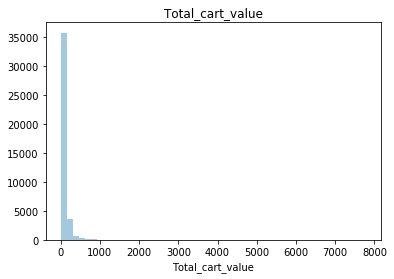

In [ ]:
sns.distplot(df_final['Total_cart_value'],kde = False,bins=50)

plt.title("Total_cart_value")

## Just checking , is our data heavily rigth skewed.
## Yes, it is.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_final.drop(['User_Score_Rank'], axis=1) 
y = df_final[['User_Score_Rank']] 


sc = StandardScaler()
X = sc.fit_transform(X) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(32682, 6) (8171, 6)
(32682, 1) (8171, 1)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

classifier=XGBRegressor(learning_rate=0.02, n_estimators=1000, seed=42)

classifier.fit(X_train,y_train)

pred=classifier.predict(X_test)

print("RMSE : ",sqrt(mean_squared_error(y_test,pred)))
print("MSE : ",mean_squared_error(y_test,pred))
print("R2 : ",r2_score(y_test,pred))

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

classifier_rf = RandomForestRegressor()

classifier_rf.fit(X_train,y_train)

pred=classifier_rf.predict(X_test)

print("RMSE : ",sqrt(mean_squared_error(y_test,pred)))
print("MSE : ",mean_squared_error(y_test,pred))
print("R2 : ",r2_score(y_test,pred))

RMSE :  5.333950151107286
MSE :  28.451024214497448
R2 :  0.9738830001265785


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200, 300, 400, 500, 600]
max_features = ['auto', 'sqrt']
max_depth = [20,40,50,60,80]
min_samples_split = [2, 5, 10,15,20]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv2 = RandomizedSearchCV(estimator = RandomForestRegressor(), 
             param_distributions = random_grid, n_iter = 50,
             scoring = 'neg_mean_absolute_error', cv = 5, 
             verbose=5, random_state=42, n_jobs = -1,return_train_score = True)

random_cv2.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 59.7min


In [ ]:
random_cv2.best_params_

In [ ]:
classifier=RandomForestRegressor(**random_cv2.best_params_)
classifier.fit(X_train,y_train)

pred=classifier.predict(X_test)

print("RMSE : ",sqrt(mean_squared_error(y_test,pred)))
print("MSE : ",mean_squared_error(y_test,pred))
print("R2 : ",r2_score(y_test,pred))

RMSE :  5.10814488019535
MSE :  26.093144117065968
R2 :  0.976047447836506


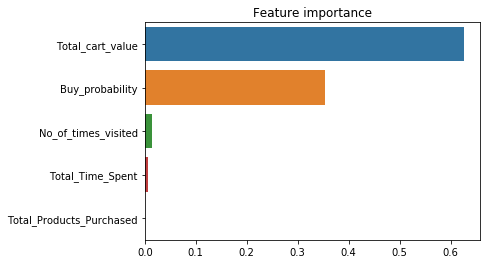

In [ ]:
imp = pd.Series(data=classifier.feature_importances_, index=['Total_cart_value', 'Total_Products_Purchased', 
                                                             'Total_Time_Spent','No_of_times_visited', 
                                                             'Buy_probability']).sort_values(ascending=False)
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, orient='h')

**`Note`** : Seems the most features are `Total_Cart_Value` and `Buy_probability`

Hence Users with higher `Total_Cart_Value` and `Buy_probability` should be targeted.